# Investigating Speeding Up G-Matrix



In [1]:
import sys
sys.path.insert(0,'/home/caldaz/module/pyGSM')
from molecule import Molecule
from pes import PES
from avg_pes import Avg_PES
import numpy as np
from nifty import pvec1d,pmat2d
import matplotlib
import matplotlib.pyplot as plt
from pytc import *
import manage_xyz
from rhf_lot import *
from psiw import *
from nifty import getAllCoords,getAtomicSymbols,click,printcool
import pybel as pb
%matplotlib inline

## 1. Building the pyTC objects

In [2]:
printcool("Build resources")
resources = ls.ResourceList.build()
printcool('{}'.format(resources))

#========================================================#
#|                   Build resources                    |#
#========================================================#
#==============================================================#
#|                       ResourceList:                        |#
#|                       CPU threads:   1                     |#
#|                       GPU contexts:  1                     |#
#|                     GPU context details:                   |#
#|    N  ID                 Name  CC  CPU Buffer  GPU Buffer  |#
#|    0   0    GeForce GTX TITAN 3.5        1024        1024  |#
#|                                                            |#
#==============================================================#


'----------------------------------------------------------------\n'

In [3]:
printcool("build the Lightspeed (pyTC) objecs")

filepath='data/butadiene_ethene.xyz'
molecule = ls.Molecule.from_xyz_file(filepath)    

geom =geometry.Geometry.build(
    resources=resources,
    molecule=molecule,
    basisname='6-31g',
    )
rhf = RHF.from_options(geometry=geom,dft_functional='B3LYP',print_level=1)
psiw = RHF_LOT.from_options(rhf=rhf)


#========================================================#
#|          build the Lightspeed (pyTC) objecs          |#
#========================================================#


## Section 2: Building the pyGSM Objects

In [4]:
printcool("Build the pyGSM Level of Theory object (LOT)")
lot=PyTC.from_options(states=[(1,0),(1,1)],psiw=psiw,do_coupling=True,fnm=filepath)

#========================================================#
#|     Build the pyGSM Level of Theory object (LOT)     |#
#========================================================#
 initializing LOT from file


In [5]:
printcool("Build the pyGSM Potential Energy Surface Object (PES)")
pes1 = PES.from_options(lot=lot,ad_idx=0,multiplicity=1)
pes2 = PES.from_options(lot=lot,ad_idx=1,multiplicity=1)
pes = Avg_PES(pes1,pes2,lot=lot)

#===========================================================#
#|  Build the pyGSM Potential Energy Surface Object (PES)  |#
#===========================================================#


In [6]:
printcool("Build the pyGSM Molecule object \n with Translation and Rotation Internal Coordinates (TRIC)")
M = Molecule.from_options(fnm=filepath,PES=pes,coordinate_type="TRIC")

#================================================================#
#|               Build the pyGSM Molecule object                |#
#|   with Translation and Rotation Internal Coordinates (TRIC)  |#
#================================================================#
 reading cartesian coordinates from file
 making primitives from options!
Build G: 0.014 Eig: 0.001
 making primitive Hessian
 forming Hessian in basis


## Section 3: Block Diagonalizing TRIC 

In [7]:
print("primitive internal coordinates")
print(M.primitive_internal_coordinates)

primitive internal coordinates
[Distance 1-9, Distance 1-2, Distance 1-8, Distance 2-3, Distance 2-7, Distance 3-4, Distance 3-16, Distance 4-14, Distance 4-15, Angle 2-1-9, Angle 8-1-9, Angle 1-2-7, Angle 3-2-7, Angle 2-3-16, Angle 4-3-16, Angle 3-4-15, Angle 14-4-15, Out-of-Plane 1-2-8-9, Out-of-Plane 2-1-3-7, Out-of-Plane 3-2-4-16, Out-of-Plane 4-3-14-15, Dihedral 9-1-2-3, Dihedral 9-1-2-7, Dihedral 8-1-2-3, Dihedral 8-1-2-7, Dihedral 1-2-3-4, Dihedral 1-2-3-16, Dihedral 7-2-3-4, Dihedral 7-2-3-16, Dihedral 2-3-4-14, Dihedral 2-3-4-15, Dihedral 16-3-4-14, Dihedral 16-3-4-15, Translation-X 1-4,7-9,14-16, Translation-Y 1-4,7-9,14-16, Translation-Z 1-4,7-9,14-16, Rotation-A 1-4,7-9,14-16, Rotation-B 1-4,7-9,14-16, Rotation-C 1-4,7-9,14-16, Distance 5-10, Distance 5-11, Distance 5-6, Distance 6-13, Distance 6-12, Angle 10-5-11, Angle 6-5-11, Angle 12-6-13, Angle 5-6-13, Out-of-Plane 5-6-10-11, Out-of-Plane 6-5-12-13, Dihedral 10-5-6-13, Dihedral 10-5-6-12, Dihedral 11-5-6-13, Dihedral 1

In [8]:
M.coord_obj.Prims.reorderPrimsByFrag()

#========================================================#
#|             Wilson B-Matrix (dq_i/dx_j)              |#
#========================================================#


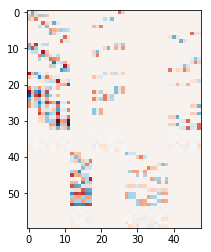

In [9]:
printcool("Wilson B-Matrix (dq_i/dx_j)")
#plt.figure(figsize = (100,100))
Bmatp = M.coord_obj.Prims.wilsonB(M.xyz)
plt.imshow(Bmatp, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|         Wilson B-Matrix in coordinate basis          |#
#========================================================#


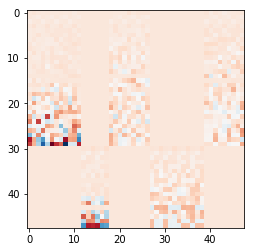

In [10]:
printcool("Wilson B-Matrix in coordinate basis")
Bmat = M.coord_obj.wilsonB(M.xyz)
plt.imshow(Bmat, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|          G-Matrix (BB^T in basis of prims)           |#
#========================================================#


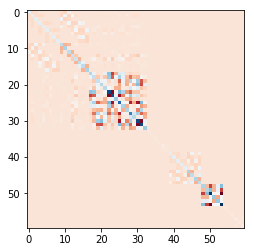

In [11]:
printcool("G-Matrix (BB^T in basis of prims)")
#plt.figure(figsize = (100,100))
G = M.coord_obj.Prims.GMatrix(M.xyz)
plt.imshow(G, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|             G-Matrix in coordinate basis             |#
#========================================================#


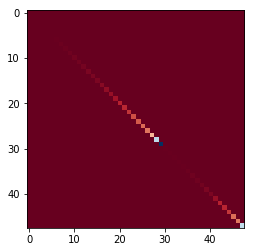

In [12]:
printcool("G-Matrix in coordinate basis")
G = M.coord_obj.GMatrix(M.xyz)
plt.imshow(G, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|                   Coordinate Basis                   |#
#========================================================#


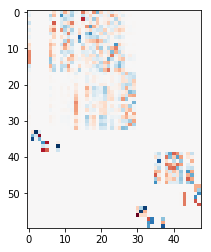

In [13]:
printcool("Coordinate Basis")
plt.imshow(M.coord_basis, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

In [14]:
print(M.coord_obj.Prims.nprims_frag)

[39, 21]
